In [33]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

In [2]:
NUM_TRIALS = 2000
BANDIT_PROBABILITIES = [0.2, 0.5, 0.75]

In [42]:
class Bandit :
    def __init__(self, p) :
        self.p = p
        self.N = 0 
        self.a = 1  
        self.b = 1 
        
    def sample(self, size = None) :
        return np.random.beta(self.a, self.b, size=size)
    
    def pull(self) :
        return np.random.random() < self.p
    
    def update(self, x) :
        self.N += 1
        self.a = self.a + x
        self.b = self.b + 1 - x
        
def plot(bandits, trial) :
    x = np.linspace(0, 1, 200)
    for b in bandits :
        y = beta.pdf(x, b.a, b.b)
        plt.plot(x, y, label = f"real p : {b.p:.2f} win rate : {b.a - 1} / {b.N}")
        #ax = sns.kdeplot(b.sample(200), label = f"real p : {b.p:.2f} win rate : {b.a - 1} / {b.N}")
    plt.title(f'Bandit distributions over {trial} trials')
    plt.legend()
    plt.show()

def experiment() :
    bandits = [Bandit(p) for p in BANDIT_PROBABILITIES]
    
    sample_points = [1, 5, 10, 20, 50, 100, 200, 1000, 1500, 1999]
    rewards = np.zeros(NUM_TRIALS)
    for i in range(NUM_TRIALS) :
        #obtain a sample by thompson sampling
        j = np.argmax([b.sample() for b in bandits])
        
        #plot the posteriors
        if i in sample_points :
            plot(bandits, i)
        
        x = bandits[j].pull()
        bandits[j].update(x)
        rewards[i] = x
        
    print(f'Total reward earned : {rewards.sum()}')

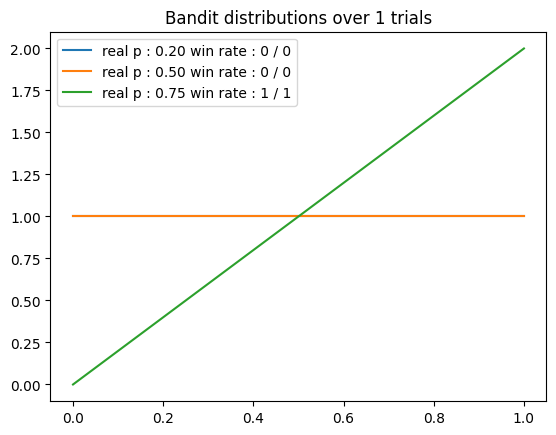

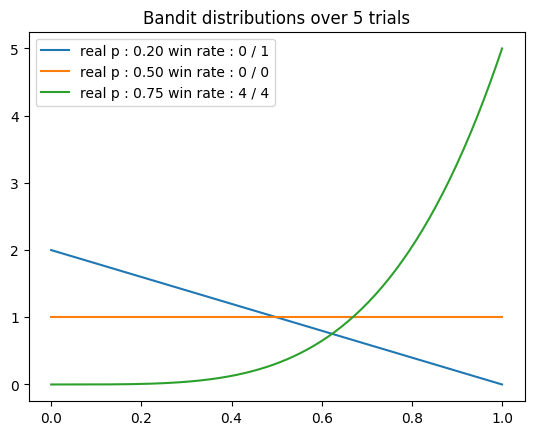

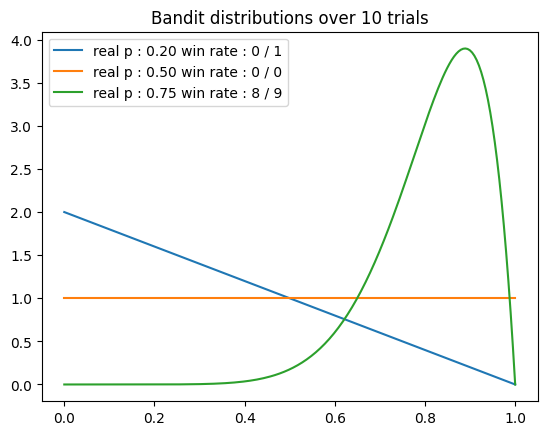

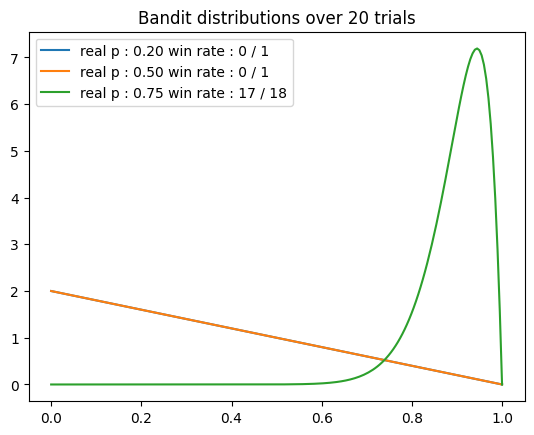

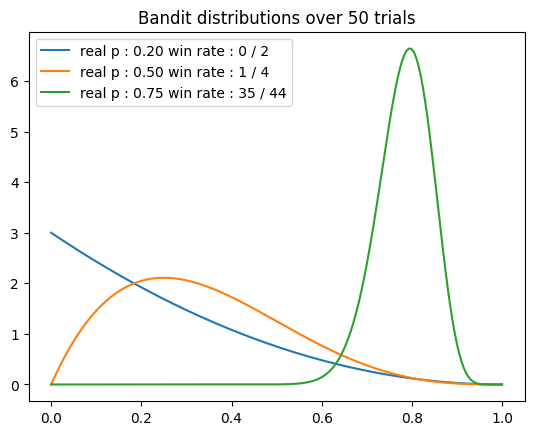

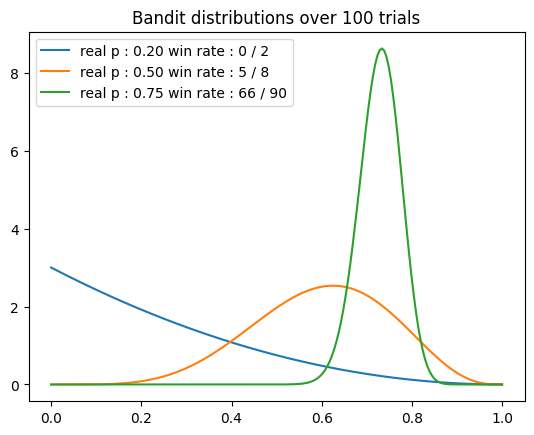

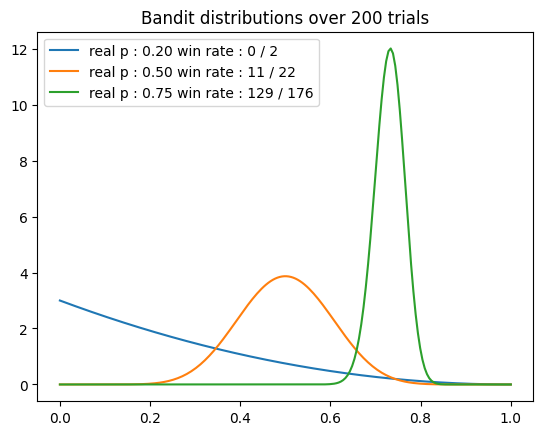

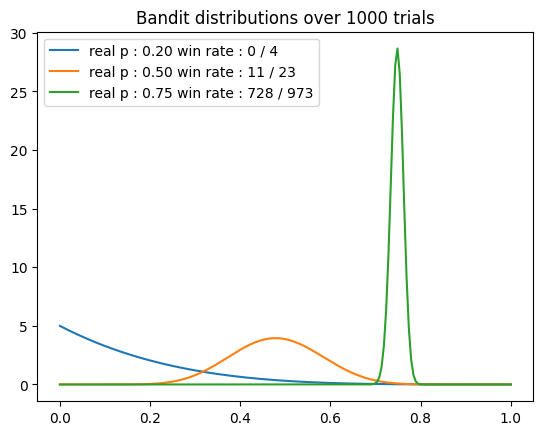

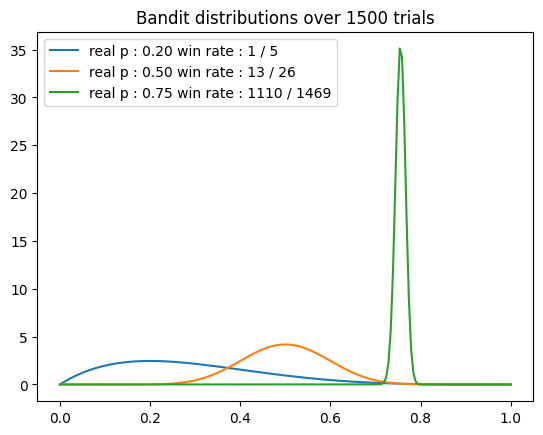

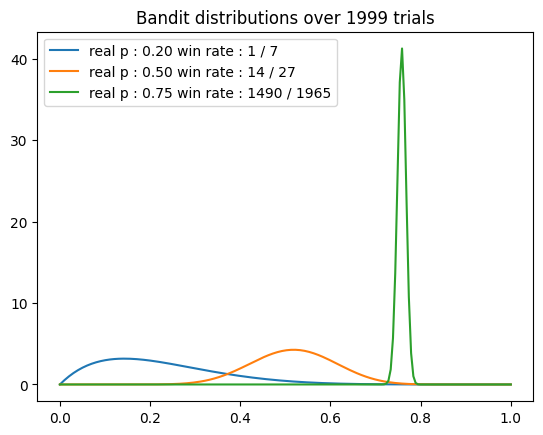

Total reward earned : 1506.0


In [43]:
if __name__ == '__main__' :
    experiment()